<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6291 entries, 2000-01-01 to 2017-03-31
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Ozone   6167 non-null   float64
dtypes: float64(1)
memory usage: 98.3 KB
None


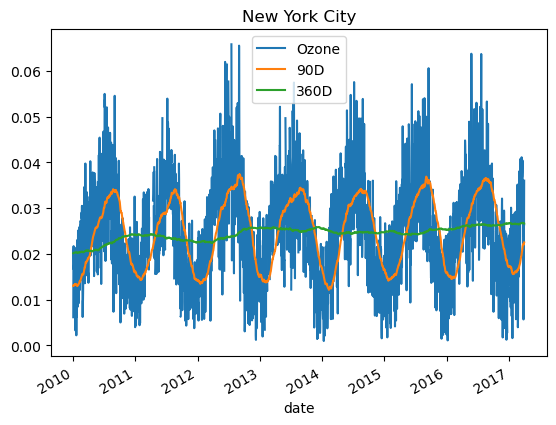

In [2]:
import os 

import pandas as pd
import matplotlib.pyplot as plt 


data_path = "data/air_quality_data"
# Import and inspect ozone data here

data = pd.read_csv(
    os.path.join(data_path, "ozone_nyc.csv"),
    parse_dates=["date"],
    index_col="date"
)
print(data.info())

# Calculate 90d and 360d rolling mean for the last price
data['90D'] = data["Ozone"].rolling(window="90D").mean()
data['360D'] = data["Ozone"].rolling(window="360D").mean()

# Plot data
data["2010":].plot(title="New York City")
plt.show()



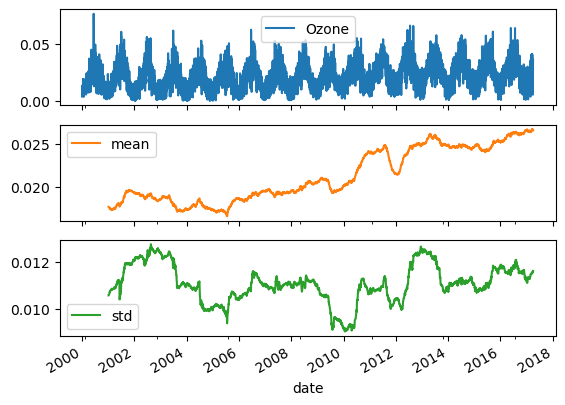

In [3]:
# Import and inspect ozone data here
data = pd.read_csv(
    os.path.join(data_path, "ozone_nyc.csv"),
    parse_dates=["date"],
    index_col="date"
).dropna()

# Calculate the rolling mean and std here
rolling_stats = data["Ozone"].rolling(window=360).agg(["mean", "std"])

# Join rolling_stats with ozone data
stats = data.join(rolling_stats)

# Plot stats
stats.plot(subplots=True)
plt.show()




In [4]:
data.head()

,Ozone
date,
2000-01-01,0.004032
2000-01-02,0.009486
2000-01-03,0.005580
2000-01-04,0.008717
2000-01-05,0.013754


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6300 entries, 2000-01-01 to 2017-03-31
Freq: D
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Ozone   6300 non-null   float64
dtypes: float64(1)
memory usage: 98.4 KB


<Axes: xlabel='date'>

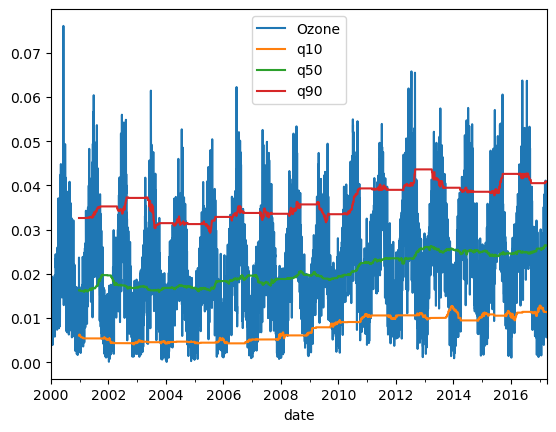

In [5]:
# Resample, interpolate and inspect ozone data here
data = data.resample("D").interpolate()
data.info()

# Create the rolling window
rolling = data.Ozone.rolling(window=360)

# Insert the rolling quantiles to the monthly returns
data['q10'] = rolling.quantile(0.1)
data['q50'] = rolling.quantile(0.5)
data['q90'] = rolling.quantile(0.9)

# Plot the data
data.plot()




In [9]:
stock_path = "data/stock_data"
data = pd.read_csv(
    os.path.join(stock_path, "google.csv"), 
    parse_dates=["Date"], 
    index_col="Date"
)
data.head()

,Close
Date,
2014-01-02,556.00
2014-01-03,551.95
2014-01-04,NaN
2014-01-05,NaN
2014-01-06,558.10


In [10]:
# Calculate differences
differences = data.diff().dropna()


# Select start price
start_price = data.first('D')

# Calculate cumulative sum
cumulative_sum = start_price.append(differences).cumsum()

# Validate cumulative sum equals data
print(data.equals(cumulative_sum))


False


/var/folders/fn/5k0jcf411lj3q3n_3j3hjwjw0000gn/T/ipykernel_10321/113461894.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  cumulative_sum = start_price.append(differences).cumsum()


In [16]:
stock_path = "data/stock_data"
data = pd.read_csv(
    os.path.join(stock_path, "apple_google.csv"), 
    parse_dates=["Date"], 
    index_col="Date"
)
data.head()

,AAPL,GOOG
Date,,
2010-01-04,NaN,313.06
2010-01-05,NaN,311.68
2010-01-06,NaN,303.83
2010-01-07,NaN,296.75
2010-01-08,NaN,300.71


<Axes: xlabel='Date'>

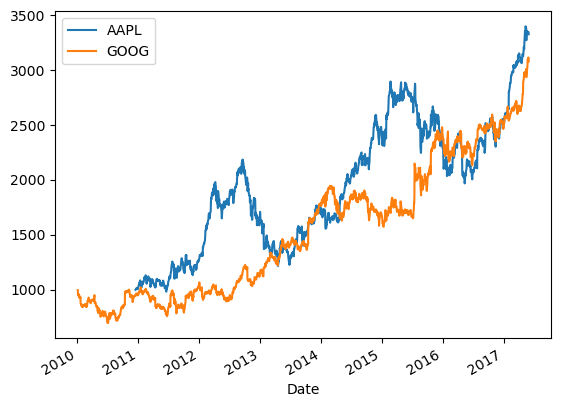

In [17]:
# Define your investment
investment = 1000

# Calculate the daily returns here
returns = data.pct_change()

# Calculate the cumulative returns here
returns_plus_one = returns.add(1)
cumulative_return = returns_plus_one.cumprod()

# Calculate and plot the investment return here 
cumulative_return.mul(investment).plot()


<Axes: xlabel='Date'>

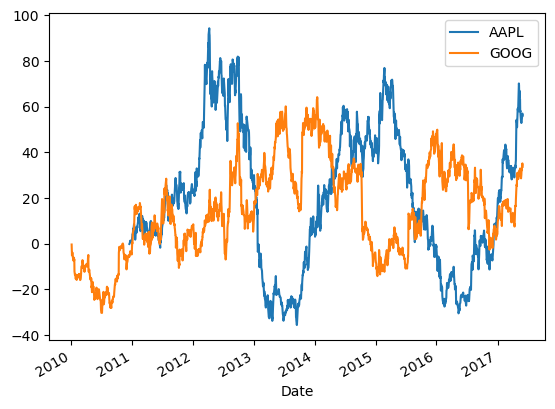

In [18]:
# Import numpy
import numpy as np

# Define a multi_period_return function
def multi_period_return(period_returns):
    return np.prod(period_returns + 1) - 1
    
# Calculate daily returns
daily_returns = data.pct_change()

# Calculate rolling_annual_returns
rolling_annual_returns = daily_returns.rolling(window="360D").apply(multi_period_return)

# Plot rolling_annual_returns
rolling_annual_returns.mul(100).plot()



<Axes: >

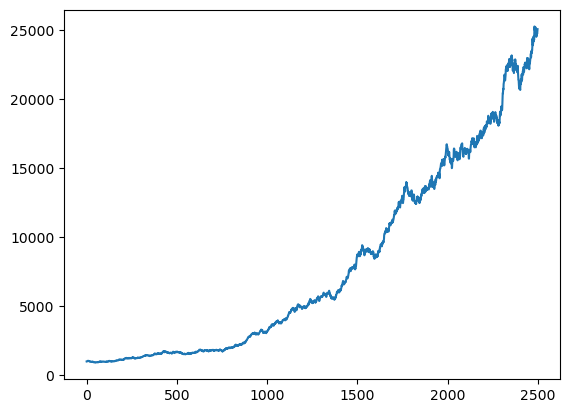

In [19]:
from numpy.random import normal, seed
from scipy.stats import norm

# Set seed here
seed(42)

# Create random_walk
random_walk = normal(loc=0.001, scale=0.01, size=2500)

# Convert random_walk to pd.series
random_walk = pd.Series(random_walk)

# Create random_prices
random_prices = random_walk.add(1).cumprod()

# Plot random_prices here
random_prices.mul(1000).plot()




In [24]:
fb = pd.read_csv(
    os.path.join(stock_path, "fb.csv")
)
fb.columns = ["date", "price"]

fb["date"] = pd.to_datetime(fb["date"])
fb.set_index("date", inplace=True)
fb.head()

,price
date,
2012-05-18,38.23
2012-05-21,34.03
2012-05-22,31.00
2012-05-23,32.00
2012-05-24,33.03


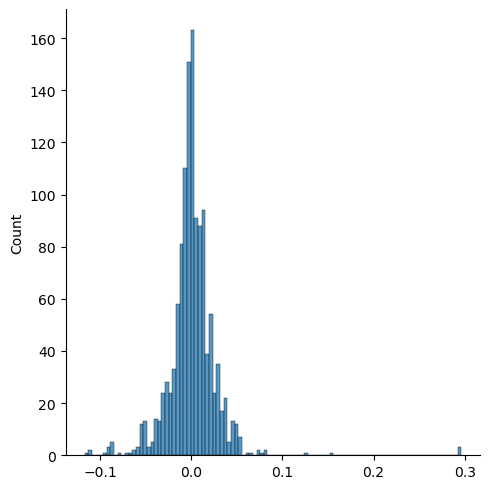

In [31]:
from numpy.random import choice
import seaborn as sns
# Set seed here
seed(42)


# Calculate daily_returns here
daily_returns = fb.pct_change().dropna().squeeze()


# Get n_obs
n_obs = daily_returns.count()

# Create random_walk
random_walk = choice(daily_returns.values, size=n_obs)

# Convert random_walk to pd.series
random_walk = pd.Series(random_walk)

# Plot random_walk distribution
sns.displot(random_walk)
plt.show()



In [34]:
fb.head()

,price,random
date,,
2012-05-18,38.23,38.23
2012-05-21,34.03,NaN
2012-05-22,31.00,NaN
2012-05-23,32.00,NaN
2012-05-24,33.03,NaN


/var/folders/fn/5k0jcf411lj3q3n_3j3hjwjw0000gn/T/ipykernel_10321/3271009017.py:10: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  random_price = start.append(random_walk)


<Axes: xlabel='date'>

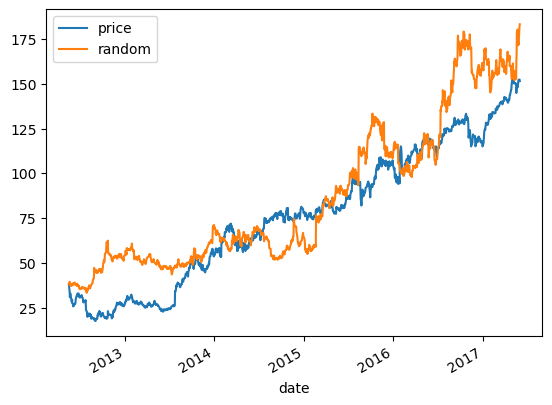

In [53]:
# Select fb start price here
start = fb.price.first("D")


random_walk = choice(daily_returns.values, size=len(fb) - 1)
random_walk = pd.Series(random_walk)

# Add 1 to random walk and append to start
random_walk = random_walk.add(1)
random_price = start.append(random_walk)

# Calculate cumulative product here
random_price = random_price.cumprod()

# Insert into fb and plot
fb['random'] = random_price.values

fb.head()
fb.plot()



In [56]:
data = pd.read_csv(
    os.path.join(stock_path, "5_stocks.csv"), 
    parse_dates=["Date"], 
    index_col="Date"
).dropna()
data.head()

,AAPL,AMZN,IBM,WMT,XOM
Date,,,,,
2001-07-06,1.57,15.27,106.50,47.34,43.40
2001-07-09,1.62,15.81,104.72,48.25,43.36
2001-07-10,1.51,15.61,101.96,47.50,42.88
2001-07-11,1.61,15.34,103.85,48.85,42.48
2001-07-12,1.74,16.49,107.25,51.85,42.72


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3999 entries, 2001-07-06 to 2017-05-31
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAPL    3999 non-null   float64
 1   AMZN    3999 non-null   float64
 2   IBM     3999 non-null   float64
 3   WMT     3999 non-null   float64
 4   XOM     3999 non-null   float64
dtypes: float64(5)
memory usage: 187.5 KB
None
          AAPL      AMZN       IBM       WMT       XOM
AAPL  1.000000  0.208731  0.460568 -0.183553  0.336413
AMZN  0.208731  1.000000  0.346407 -0.367620 -0.133965
IBM   0.460568  0.346407  1.000000  0.155445  0.367253
WMT  -0.183553 -0.367620  0.155445  1.000000  0.178833
XOM   0.336413 -0.133965  0.367253  0.178833  1.000000


<Axes: >

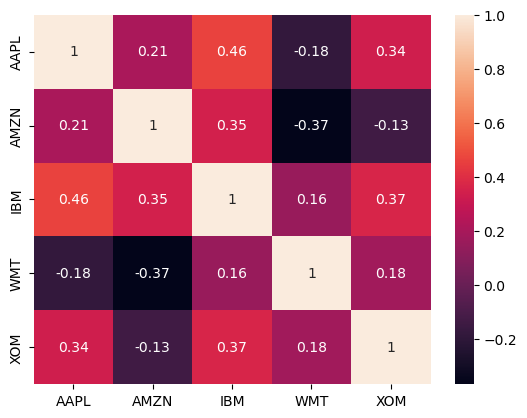

In [57]:
# Inspect data here
print(data.info())

# Calculate year-end prices here
annual_prices = data.resample("A").last()

# Calculate annual returns here
annual_returns = annual_prices.pct_change()

# Calculate and print the correlation matrix here
correlations = annual_returns.corr()
print(correlations)

# Visualize the correlations as heatmap here
sns.heatmap(correlations, annot=True)
